In [1]:
import uproot
import numpy as np

import matplotlib.pyplot as plt

In [3]:
with uproot.open("../CERN2022-build/out_data/tbeamdata0000.root") as f:
    for k in f:
        print(k)
        try:
            for kk in f[k]:
                print(kk)
        except:
            pass

outData;1
<TBranch 'NEvent' at 0x7fbaec1f7a90>
<TBranch 'Tracker_NHit_X_0' at 0x7fbaec1f9340>
<TBranch 'Tracker_NHit_Y_0' at 0x7fbaec1f97c0>
<TBranch 'Tracker_NHit_X_1' at 0x7fbaec234730>
<TBranch 'Tracker_NHit_Y_1' at 0x7fbaec234cd0>
<TBranch 'Tracker_X_0' at 0x7fbaec2a7970>
<TBranch 'Tracker_Y_0' at 0x7fbaec22fa30>
<TBranch 'Tracker_X_1' at 0x7fbaec216430>
<TBranch 'Tracker_Y_1' at 0x7fbaec216d00>
<TBranch 'GammaCal_EDep_CC' at 0x7fbaec207610>
<TBranch 'GammaCal_EDep_TL' at 0x7fbaec207ee0>
<TBranch 'GammaCal_EDep_TR' at 0x7fbaec20f7f0>
<TBranch 'GammaCal_EDep_BL' at 0x7fbaec215100>
<TBranch 'GammaCal_EDep_BR' at 0x7fbaec2159d0>
<TBranch 'GammaCal_EDep_CL' at 0x7fbaec2222e0>
<TBranch 'GammaCal_EDep_CR' at 0x7fbaec222bb0>
<TBranch 'CrystalA_EDep' at 0x7fbaec2284c0>
<TBranch 'CrystaB_EDep' at 0x7fbaec228d90>
<TBranch 'CrystalC_EDep' at 0x7fbaec22d6a0>
crossPos;1
<TBranch 'EvID' at 0x7fbaec244610>
<TBranch 'Xcrossing' at 0x7fbaec244fa0>
<TBranch 'Ycrossing' at 0x7fbaec259f70>
<TBranch 'P

In [2]:
with uproot.open("../CERN2022-build/out_data/tbeamdata0000.root")["crossPos"] as f:
    crossPos = f.arrays(library = "np")
    # for k in f:
    #     print(k)
    
    for k in crossPos.keys():
        comando = f"{k} = crossPos['{k}']"
        print(f"Eseguirò. ---> \t {comando}")
        exec(comando)

Eseguirò. ---> 	 EvID = crossPos['EvID']
Eseguirò. ---> 	 Xcrossing = crossPos['Xcrossing']
Eseguirò. ---> 	 Ycrossing = crossPos['Ycrossing']
Eseguirò. ---> 	 PDGEncoding = crossPos['PDGEncoding']
Eseguirò. ---> 	 ParticleID = crossPos['ParticleID']
Eseguirò. ---> 	 totEnergy = crossPos['totEnergy']


In [ ]:
for i in range(1000):
    print(f"{EvID[i]}\t\t{ParticleID[i]}")

In [3]:
for i in range(10):

    logico = (EvID==i)
    print(logico.sum())

    pp = ParticleID[logico]

    # print(pp.shape)
    # print(np.unique(pp).shape)
    
    assert pp.shape == np.unique(pp).shape

175932
177356
177006
176929
166881
169923
171106
181525
167031
174968


In [16]:
# logicElePhotons = ((PDGEncoding>-25) & (PDGEncoding<25))
logicElePhotons.sum() / PDGEncoding.shape[0]

logicEle = np.abs(PDGEncoding) == 11
logicPhot = PDGEncoding == 22

logicElePhotons = logicEle | logicPhot
logicElePhotons.sum() / PDGEncoding.shape[0]



0.9992279699365892

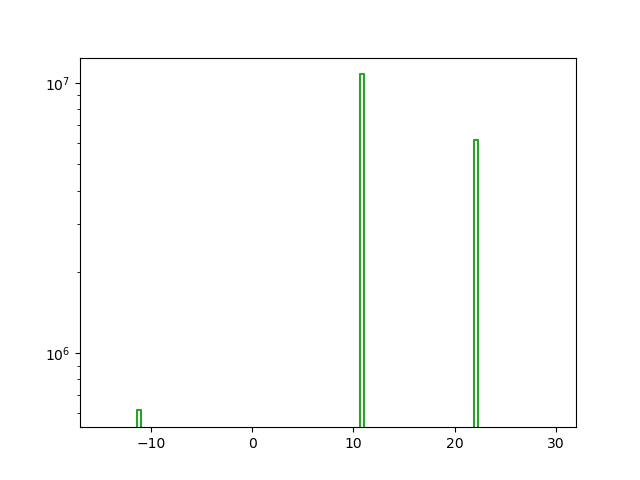

In [19]:
%matplotlib widget 

h, bins = np.histogram(PDGEncoding[logicElePhotons], bins = 100, range = (-15, 30))
binc = bins[:-1] + (bins[1] - bins[0])/2


fig, ax = plt.subplots()
ax.plot(binc, h, ds = "steps-mid", color = "tab:green")

ax.set_yscale("log")

plt.show()

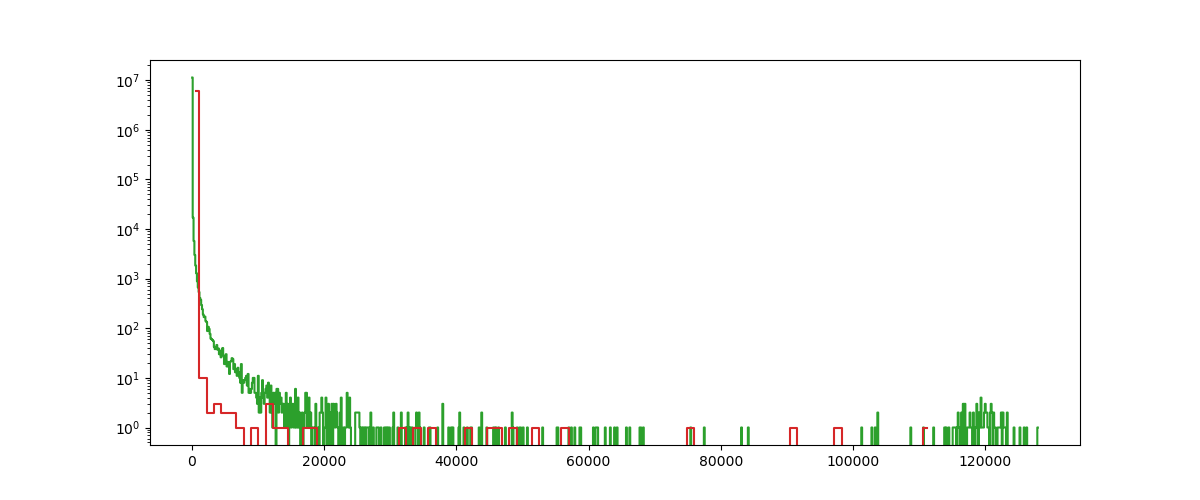

93


In [28]:
%matplotlib widget 



fig, ax = plt.subplots()
fig.set_size_inches(12,5)

h, bins = np.histogram(totEnergy[logicEle], bins = 1000,)
binc = bins[:-1] + (bins[1] - bins[0])/2
ax.plot(binc, h, ds = "steps-mid", color = "tab:green")

h, bins = np.histogram(totEnergy[logicPhot], bins = 100, )
binc = bins[:-1] + (bins[1] - bins[0])/2
ax.plot(binc, h, ds = "steps-mid", color = "tab:red")

ax.set_yscale("log")

plt.show()

print((totEnergy[logicEle] > 100000).sum())

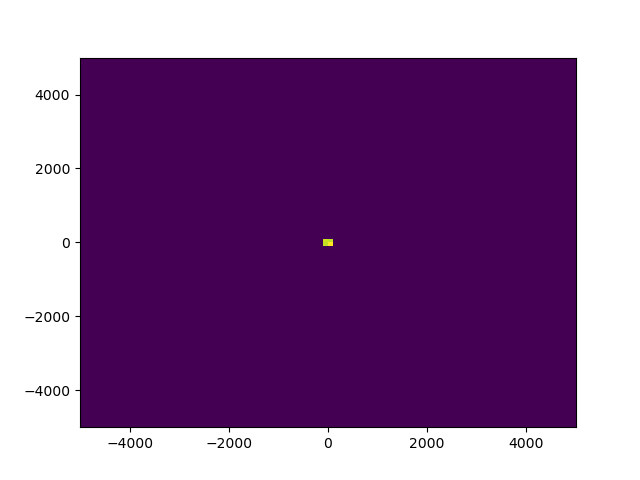

In [31]:
fig, ax = plt.subplots()

ax.hist2d(Xcrossing[logicEle], Ycrossing[logicEle], bins = 100)

plt.show()